In [2]:
import pandas as pd
import geopandas as gpd
import transbigdata as tbd

# bus_station_point

In [7]:
df_pol= pd.read_csv(r"D:\bike\data\bus_station_final.csv")
df_pol

,Unnamed: 0,level_0,match,id_station,lng,lat,location,name,sequence,id,busstops
0,0,0,0,BV10242435,114.118955,22.531607,"114.118955,22.531607",火车站,1,4.400000e+11,"[{'id': 'BV10242435', 'location': '114.118955,..."
1,1,0,1,BV11042896,114.118993,22.534839,"114.118993,22.534839",人民南地铁站,2,4.400000e+11,"[{'id': 'BV10242435', 'location': '114.118955,..."
2,2,0,2,BV11161011,114.118797,22.537426,"114.118797,22.537426",罗湖小学2,3,4.400000e+11,"[{'id': 'BV10242435', 'location': '114.118955,..."
3,3,0,3,BV11354437,114.118689,22.540595,"114.118689,22.540595",国贸1,4,4.400000e+11,"[{'id': 'BV10242435', 'location': '114.118955,..."
4,4,0,4,BV10382979,114.121866,22.547661,"114.121866,22.547661",东门3,5,4.400000e+11,"[{'id': 'BV10242435', 'location': '114.118955,..."
...,...,...,...,...,...,...,...,...,...,...,...
26401,26401,906,7,BV10245462,113.962624,22.519600,"113.962624,22.5196",滨海沙河东立交,8,4.400000e+11,"[{'id': 'BV10243592', 'location': '113.93169,2..."
26402,26402,906,8,BV10245463,113.983910,22.519501,"113.98391,22.519501",滨海深湾立交,9,4.400000e+11,"[{'id': 'BV10243592', 'location': '113.93169,2..."
26403,26403,906,9,BV11451848,113.995796,22.522141,"113.995796,22.522141",深圳湾公园地铁站,10,4.400000e+11,"[{'id': 'BV10243592', 'location': '113.93169,2..."
26404,26404,906,10,BV10244085,113.999962,22.524563,"113.999962,22.524563",红树林,11,4.400000e+11,"[{'id': 'BV10243592', 'location': '113.93169,2..."


In [11]:
from shapely.geometry import Point,LineString,Polygon
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

In [12]:
df_pol['points'] = list(zip(df_pol['lng'], df_pol['lat']))
df_pol['points'] = df_pol['points'].apply(Point)

In [13]:
df_pol.head()

,Unnamed: 0,level_0,match,id_station,lng,lat,location,name,sequence,id,busstops,points
0,0,0,0,BV10242435,114.118955,22.531607,"114.118955,22.531607",火车站,1,4.400000e+11,"[{'id': 'BV10242435', 'location': '114.118955,...",POINT (114.118955 22.531607)
1,1,0,1,BV11042896,114.118993,22.534839,"114.118993,22.534839",人民南地铁站,2,4.400000e+11,"[{'id': 'BV10242435', 'location': '114.118955,...",POINT (114.118993 22.534839)
2,2,0,2,BV11161011,114.118797,22.537426,"114.118797,22.537426",罗湖小学2,3,4.400000e+11,"[{'id': 'BV10242435', 'location': '114.118955,...",POINT (114.118797 22.537426)
3,3,0,3,BV11354437,114.118689,22.540595,"114.118689,22.540595",国贸1,4,4.400000e+11,"[{'id': 'BV10242435', 'location': '114.118955,...",POINT (114.118689 22.540595)
4,4,0,4,BV10382979,114.121866,22.547661,"114.121866,22.547661",东门3,5,4.400000e+11,"[{'id': 'BV10242435', 'location': '114.118955,...",POINT (114.121866 22.547661)


In [14]:
df_pol_points = gpd.GeoDataFrame({'geometry':df_pol['points']})

In [17]:
df_pol_points1 = df_pol_points.set_crs(epsg = 4326)

<AxesSubplot:>

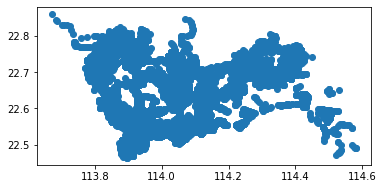

In [19]:
df_pol_points1.plot()

In [35]:
df_pol_points1.to_file('bus_station_point.shp',encoding = 'utf-8-sig')

In [20]:
import matplotlib.pyplot as plt

In [21]:
region = gpd.read_file(r"D:\bike\shp\深圳\深圳街道.shp")

In [22]:
region

,JDNAME,JDCODE,OBJECTID,SHAPE_Leng,SHAPE_Area,geometry
0,笋岗,440303005,1.0,7354.243701,3.467528e+06,"POLYGON ((510214.089 2495651.497, 510214.032 2..."
1,翠竹,440303007,2.0,8123.061832,3.437404e+06,"POLYGON ((513601.371 2497697.432, 513573.992 2..."
2,莲塘,440303010,3.0,19429.536095,1.104122e+07,"POLYGON ((520390.877 2495550.783, 520383.652 2..."
3,新湖,440306016,4.0,41262.738311,4.036503e+07,"POLYGON ((493125.277 2526347.765, 493122.625 2..."
4,凤凰,440306017,5.0,29274.256376,2.191594e+07,"POLYGON ((492256.216 2514406.764, 492256.174 2..."
...,...,...,...,...,...,...
71,西乡,440306001,72.0,55535.521302,5.811580e+07,"POLYGON ((487168.119 2497108.909, 487133.378 2..."
72,坂田,440307003,73.0,31737.341475,2.847636e+07,"POLYGON ((506555.377 2508823.354, 506556.210 2..."
73,南湖,440303002,74.0,7849.542230,2.772948e+06,"POLYGON ((513051.752 2493681.397, 513052.158 2..."
74,东晓,440303008,75.0,8388.538631,3.429644e+06,"POLYGON ((511685.474 2499482.659, 511687.897 2..."


<AxesSubplot:>

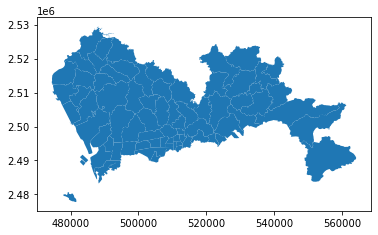

In [23]:
region.plot()

In [29]:
region_copy = region.to_crs(epsg = 4326)

<AxesSubplot:>

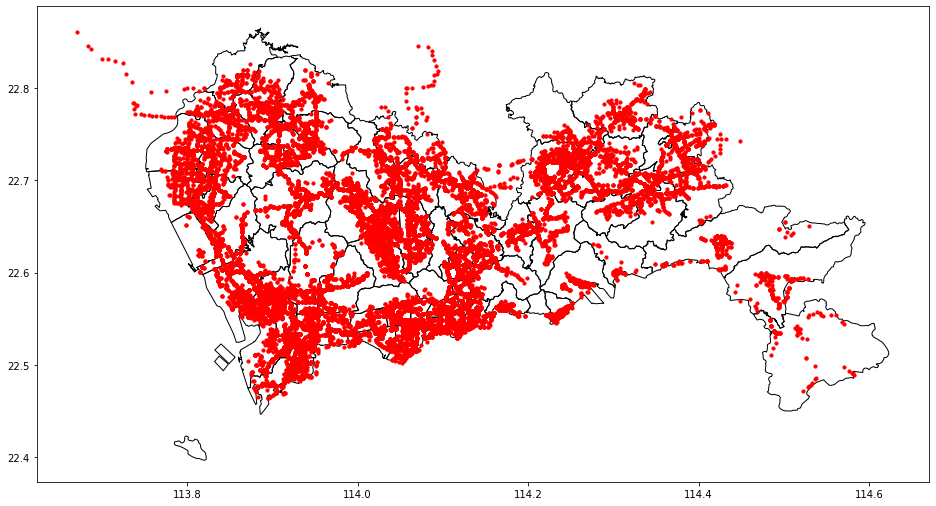

In [34]:
fig,ax=plt.subplots(figsize=(16,16))
region_copy.plot(ax = ax, edgecolor='k',facecolor='none')
df_pol_points1.plot(ax = ax,markersize = 10, c = 'red')

# rail_station

In [41]:
rail_station= pd.read_csv(r"D:\bike\data\subway stop.csv")
rail_station

,Unnamed: 0,stationnames,linename,lng,lat,geometry,line,id
0,0,罗湖,地铁1号线(罗宝线)(罗湖-机场东),114.113806,22.534290,POINT (114.11380582208768 22.534289517817694),地铁1号线,1
1,1,国贸,地铁1号线(罗宝线)(罗湖-机场东),114.113641,22.542407,POINT (114.11364085322093 22.54240741378374),地铁1号线,2
2,2,老街,地铁1号线(罗宝线)(罗湖-机场东),114.111150,22.546795,POINT (114.11115025576056 22.54679520135993),地铁1号线,3
3,3,大剧院,地铁1号线(罗宝线)(罗湖-机场东),114.103284,22.544879,POINT (114.1032838283854 22.544878927108766),地铁1号线,4
4,4,科学馆,地铁1号线(罗宝线)(罗湖-机场东),114.089758,22.543326,POINT (114.08975821890358 22.543326095193787),地铁1号线,5
...,...,...,...,...,...,...,...,...
709,0,会展城,地铁20号线(会展城-机场北),113.764604,22.714993,POINT (113.764603752987 22.714992671189865),地铁20号线,1
710,1,国展北,地铁20号线(会展城-机场北),113.771784,22.706029,POINT (113.771784011474 22.70602915051575),地铁20号线,2
711,2,国展,地铁20号线(会展城-机场北),113.772743,22.698833,POINT (113.77274293125794 22.698832556758674),地铁20号线,3
712,3,国展南,地铁20号线(会展城-机场北),113.773348,22.687057,POINT (113.77334762146252 22.68705685948637),地铁20号线,4


In [43]:
rail_station['point'] = list(zip(rail_station['lng'], rail_station['lat']))
rail_station['point'] = rail_station['point'].apply(Point)

In [44]:
rail_station_point = gpd.GeoDataFrame(rail_station,geometry =rail_station['point'])

In [45]:
rail_station_point.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Unnamed: 0    714 non-null    int64   
 1   stationnames  714 non-null    object  
 2   linename      714 non-null    object  
 3   lng           714 non-null    float64 
 4   lat           714 non-null    float64 
 5   geometry      714 non-null    geometry
 6   line          714 non-null    object  
 7   id            714 non-null    int64   
 8   point         714 non-null    object  
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 50.3+ KB


In [50]:
rail_station_point.head()

,Unnamed: 0,stationnames,linename,lng,lat,geometry,line,id,point
0,0,罗湖,地铁1号线(罗宝线)(罗湖-机场东),114.113806,22.534290,POINT (114.11381 22.53429),地铁1号线,1,POINT (114.1138058 22.53428952)
1,1,国贸,地铁1号线(罗宝线)(罗湖-机场东),114.113641,22.542407,POINT (114.11364 22.54241),地铁1号线,2,POINT (114.1136409 22.54240741)
2,2,老街,地铁1号线(罗宝线)(罗湖-机场东),114.111150,22.546795,POINT (114.11115 22.54680),地铁1号线,3,POINT (114.1111503 22.5467952)
3,3,大剧院,地铁1号线(罗宝线)(罗湖-机场东),114.103284,22.544879,POINT (114.10328 22.54488),地铁1号线,4,POINT (114.1032838 22.54487893)
4,4,科学馆,地铁1号线(罗宝线)(罗湖-机场东),114.089758,22.543326,POINT (114.08976 22.54333),地铁1号线,5,POINT (114.0897582 22.5433261)


In [51]:
del rail_station_point['point']

<AxesSubplot:>

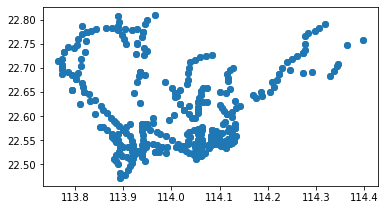

In [52]:
rail_station_point.plot()

In [53]:
rail_station_point.to_file('rail_station_point.shp')

<ipython-input-53-d42d1c567ec6>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  rail_station_point.to_file('rail_station_point.shp')


<AxesSubplot:>

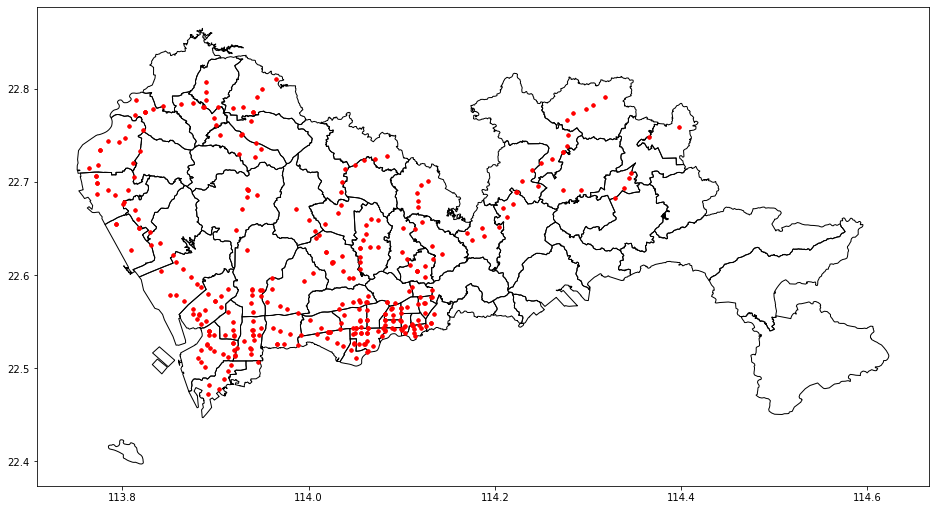

In [47]:
fig,ax=plt.subplots(figsize=(16,16))
region_copy.plot(ax = ax, edgecolor='k',facecolor='none')
rail_station_point.plot(ax = ax,markersize = 10, c = 'red')

In [54]:
rail_station_point2 = gpd.read_file(r"D:\bike\data\rail_station_point\rail_station_point.shp")

In [56]:
rail_station_point2.head()

,Unnamed_ 0,stationnam,linename,lng,lat,line,id,geometry
0,0,??,??1??(???)(??-???),114.113806,22.534290,??1??,1,POINT (114.11381 22.53429)
1,1,??,??1??(???)(??-???),114.113641,22.542407,??1??,2,POINT (114.11364 22.54241)
2,2,??,??1??(???)(??-???),114.111150,22.546795,??1??,3,POINT (114.11115 22.54680)
3,3,???,??1??(???)(??-???),114.103284,22.544879,??1??,4,POINT (114.10328 22.54488)
4,4,???,??1??(???)(??-???),114.089758,22.543326,??1??,5,POINT (114.08976 22.54333)


<AxesSubplot:>

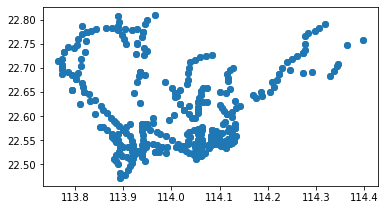

In [55]:
rail_station_point2.plot()

# 火星坐标转换成wsg84

In [8]:
# -*- coding: utf-8 -*-
import json
import math

x_pi = 3.14159265358979324 * 3000.0 / 180.0
pi = 3.1415926535897932384626  # π
a = 6378245.0  # 长半轴
ee = 0.00669342162296594323  # 扁率

def wgs84togcj02(lng, lat):
    """
    WGS84转GCJ02(火星坐标系)
    :param lng:WGS84坐标系的经度
    :param lat:WGS84坐标系的纬度
    :return:
    """
    if out_of_china(lng, lat):  # 判断是否在国内
        return lng, lat
    dlat = transformlat(lng - 105.0, lat - 35.0)
    dlng = transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * pi
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * pi)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * pi)
    mglat = lat + dlat
    mglng = lng + dlng
    return [mglng, mglat]


def gcj02towgs84(lng, lat):
    """
    GCJ02(火星坐标系)转GPS84
    :param lng:火星坐标系的经度
    :param lat:火星坐标系纬度
    :return:
    """
    if out_of_china(lng, lat):
        return lng, lat
    dlat = transformlat(lng - 105.0, lat - 35.0)
    dlng = transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * pi
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * pi)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * pi)
    mglat = lat + dlat
    mglng = lng + dlng
    return [lng * 2 - mglng, lat * 2 - mglat]


def transformlat(lng, lat):
    ret = -100.0 + 2.0 * lng + 3.0 * lat + 0.2 * lat * lat + \
        0.1 * lng * lat + 0.2 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lat * pi) + 40.0 *
            math.sin(lat / 3.0 * pi)) * 2.0 / 3.0
    ret += (160.0 * math.sin(lat / 12.0 * pi) + 320 *
            math.sin(lat * pi / 30.0)) * 2.0 / 3.0
    return ret


def transformlng(lng, lat):
    ret = 300.0 + lng + 2.0 * lat + 0.1 * lng * lng + \
        0.1 * lng * lat + 0.1 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lng * pi) + 40.0 *
            math.sin(lng / 3.0 * pi)) * 2.0 / 3.0
    ret += (150.0 * math.sin(lng / 12.0 * pi) + 300.0 *
            math.sin(lng / 30.0 * pi)) * 2.0 / 3.0
    return ret


def out_of_china(lng, lat):
    """
    判断是否在国内，不在国内不做偏移
    :param lng:
    :param lat:
    :return:
    """
    if lng < 72.004 or lng > 137.8347:
        return True
    if lat < 0.8293 or lat > 55.8271:
        return True
    return False




In [9]:
if __name__ == '__main__':
    [lng,lat]=[114.118993,22.534839]
    [dstlng, dstlat] = gcj02towgs84(lng, lat)
    print(dstlng, dstlat)

114.1138945956573 22.537529866258
